In [85]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.patches import Polygon

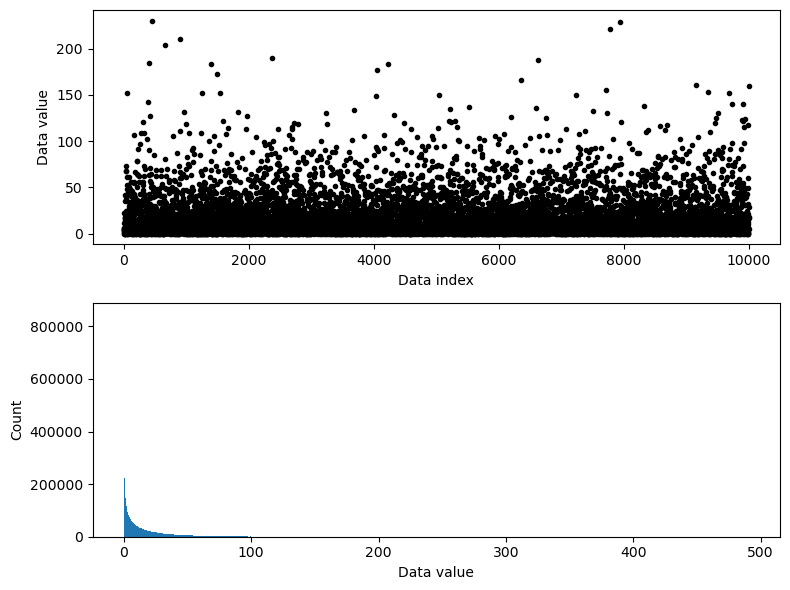

In [86]:
pop_n = int(1e7)
population = (4 * np.random.randn(pop_n)) ** 2
pop_mean = np.mean(population)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

ax[0].plot(population[::1000], 'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population, bins='fd')
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [87]:
sample_size = 40
confidence = 0.95

sample_data = population[np.random.randint(0, pop_n, sample_size)]
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

num_boots = 1000
boot_means = np.zeros(num_boots)

for boot_i in range(num_boots):
    boot_means[boot_i] = np.mean(np.random.choice(sample_data, sample_size))

conf_int = [0, 0]
conf_int[0] = np.percentile(boot_means, (100 - 100 * confidence) / 2)
conf_int[1] = np.percentile(boot_means, 100 - (100 - 100 * confidence) / 2)

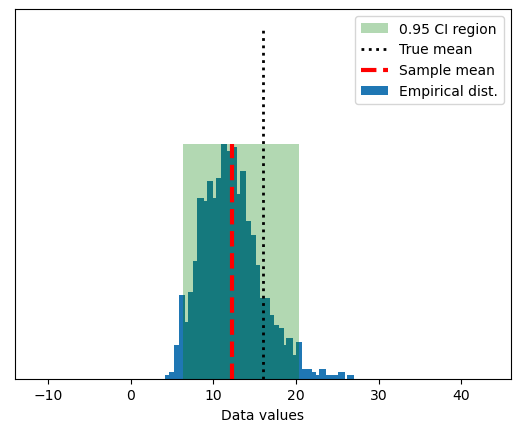

In [107]:
fig, ax = plt.subplots(1, 1)

y, x = np.histogram(boot_means, 40)
x = (x[:-1] + x[1:]) / 2
y = y / np.max(y)

ax.bar(x, y)

y = np.array([[conf_int[0], 0], [conf_int[1], 0], [conf_int[1], 1], [conf_int[0], 1]])
p = Polygon(y, facecolor='g', alpha=0.3)
ax.add_patch(p)

ax.plot([pop_mean, pop_mean], [0, 1.5], 'k:', linewidth=2)
ax.plot([sample_mean, sample_mean], [0, 1], 'r--', linewidth=3)
ax.set_xlim([pop_mean - 30, pop_mean + 30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend([f'{confidence} CI region', 'True mean', 'Sample mean', 'Empirical dist.'])

plt.show()

In [135]:
ci_tmp = (1 - confidence) / 2
conf_int_2 = sample_mean + stats.t.ppf([ci_tmp, 1 - ci_tmp], sample_size - 1) * (sample_std / np.sqrt(sample_size))

print(f'Empirical: {conf_int[0]:.5f} - {conf_int[1]:.5f}')
print(f'Analytic: {conf_int_2[0]:5f} - {conf_int_2[1]:.5f}')

Empirical: 6.35260 - 20.33089
Analytic: 5.160759 - 19.32526


In [180]:
sample_size = 40
confidence = 0.95

sample_data = population[np.random.randint(0, pop_n, sample_size)]
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)

num_boots = 1000
boots_stds = np.ones(num_boots)

for boot_i in range(num_boots):
    boots_stds[boot_i] = np.std(np.random.choice(sample_data, sample_size), ddof=1)

conf_int = [0, 0]
conf_int[0] = np.percentile(boots_stds, (100 - 100 * confidence) / 2)
conf_int[1] = np.percentile(boots_stds, 100 - (100 - 100 * confidence) / 2)

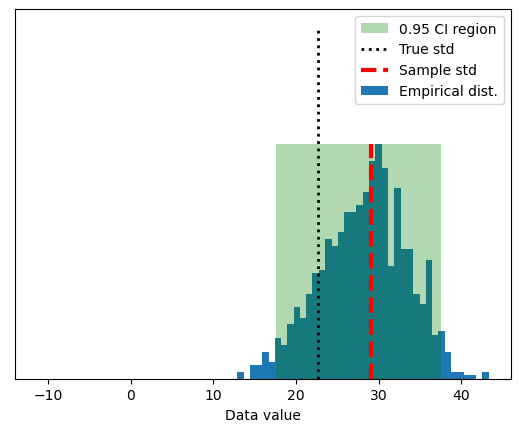

In [181]:
fig, ax = plt.subplots(1, 1)

y, x = np.histogram(boots_stds, 40)
x = (x[:-1] + x[1:]) / 2
y = y / np.max(y)

ax.bar(x, y)

y = np.array([[conf_int[0], 0], [conf_int[1], 0], [conf_int[1], 1], [conf_int[0], 1]])
p = Polygon(y, facecolor='g', alpha=0.3)
ax.add_patch(p)

ax.plot([np.std(population), np.std(population)], [0, 1.5], 'k:', linewidth=2)
ax.plot([sample_std, sample_std], [0, 1], 'r--', linewidth=3)

ax.set_yticks([])
ax.set_xlabel('Data value')
ax.set_xlim([pop_mean - 30, pop_mean + 30])
ax.legend([f'{confidence} CI region', 'True std', 'Sample std', 'Empirical dist.'])

plt.show()